# KNN(K-Nearest Neighbor)

In [2]:
# 상위 경로에 있는 module import하기 위한 설정
import setting_location   # 다른 경로에 있는 모듈 import 하기 위해 모듈이 있는 경로를 추가
# 코드는 다음과 같음
# import sys
# sys.path.insert(0, "C:\\Users\\hyunsungKim\\ITStudy\\TIL\\Python\\4.Introduction_to_ML_with_Python")
# sys.path
# # 혹시 여러번 실행했을 때 추가된 경로 삭제하는 방법
# # sys.path.remove("C:\\Users\\hyunsungKim\\ITStudy\\TIL\\Python\\4.Introduction_to_ML_with_Python")

In [4]:
from preamble import *   # 사용자 정의 모듈 import

X.shape: (26, 2)


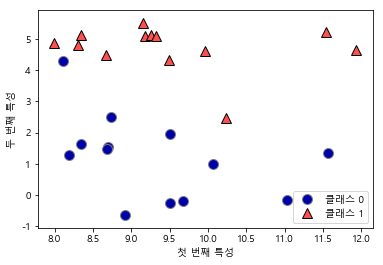

In [5]:
# 데이터셋을 만듭니다
X, y = mglearn.datasets.make_forge()    # X, y: numpy array 형태

# 산점도를 그립니다
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")

print("X.shape: {}".format(X.shape))

Text(0,0.5,'타깃')

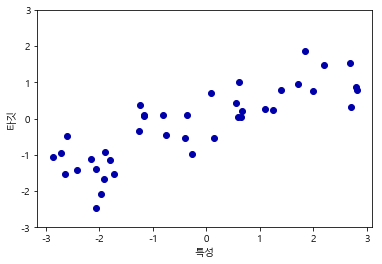

In [6]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [7]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()   # scikit-learn 모듈 내의 데이터 불러오기
print("cancer.keys(): {}".format(cancer.keys()))   # cancer 데이터의 변수명

cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [8]:
print("유방암 데이터의 형태: {}".format(cancer.data.shape))

유방암 데이터의 형태: (569, 30)


In [9]:
print("클래스별 샘플 갯수:\n{}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스별 샘플 갯수:
{'malignant': 212, 'benign': 357}


In [10]:
print("특성 이름:\n{}".format(cancer.feature_names))

특성 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [11]:
from sklearn.datasets import load_boston

boston = load_boston()
print("데이터의 형태: {}".format(boston.data.shape))

데이터의 형태: (506, 13)


In [12]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


In [13]:
# boston class가 가지고 있는 instance 및 정보 확인
dir(boston)

['DESCR', 'data', 'feature_names', 'target']

### k-NN Classification

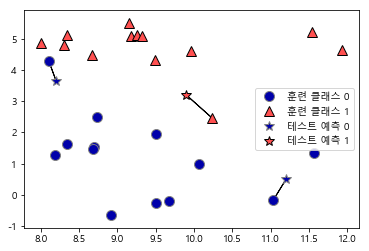

In [14]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

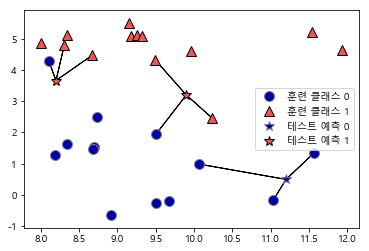

In [15]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [16]:
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [18]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [19]:
print("테스트 세트 예측: {}".format(clf.predict(X_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [20]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


### kNN Classifier 분석

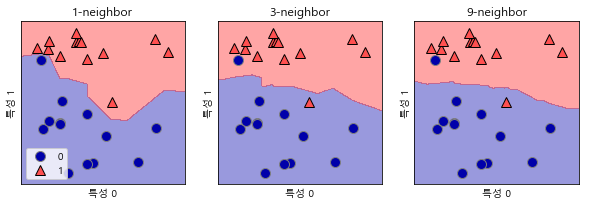

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)   # model fit
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)   # hyperplane
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)   # scatter plot으로 각 group마다 다른 기호로 그림
    ax.set_title("{}-neighbor".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)
plt.show()

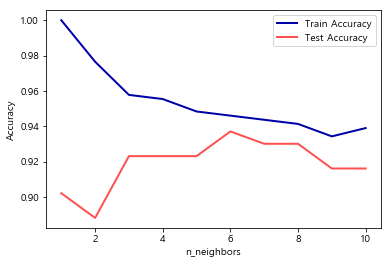

In [22]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# 1 에서 10 까지 n_neighbors를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)   # fit
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장(test accuracy)
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="Train Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

### k-NN Regression

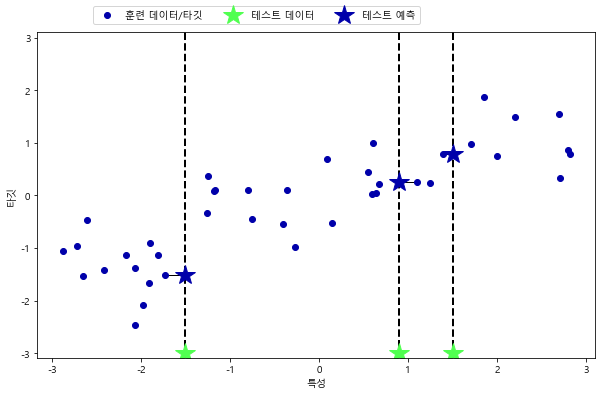

In [23]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

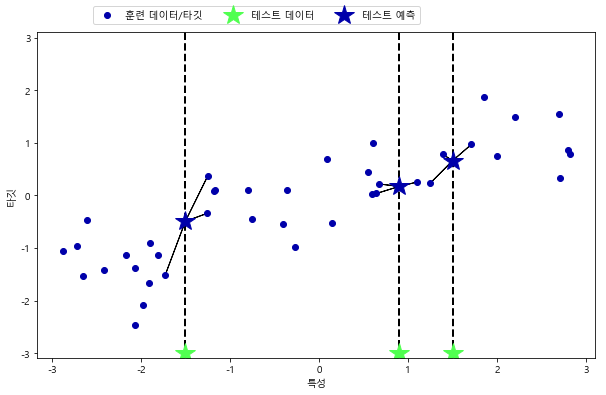

In [24]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [25]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다
reg = KNeighborsRegressor(n_neighbors=3)

# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [26]:
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))

테스트 세트 예측:
[-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [27]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


#### k-NN Regressor 분석

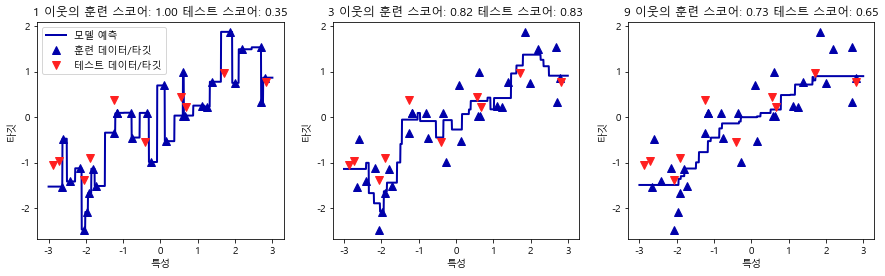

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")
plt.show()